<a href="https://colab.research.google.com/github/ShailendraSChauhan/DP100/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clustering**
- **Citation** : The seeds dataset used in this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin by Dua, D. and Graff, C. (2019). and can be downloaded from the UCI Machine Learning Repository, University of California at Irvine, School of Information and Computer Science.
- **Data Set** : https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv

- **Library : https://scikit-learn.org/stable/modules/clustering.html**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv

seed = pd.read_csv("seeds.csv")
seed.sample(5)

--2024-02-05 10:08:53--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0s      

2024-02-05 10:08:53 (112 MB/s) - ‘seeds.csv’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
198,12.62,13.67,0.8481,5.410,2.911,3.306,5.231,2
81,18.72,16.19,0.8977,6.006,3.857,5.324,5.879,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
77,20.71,17.23,0.8763,6.579,3.814,4.451,6.451,1
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,1


Drop Species column to prpare it for cluster

In [7]:
data = seed.drop("species", axis=1)
data.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
144,11.82,13.40,0.8274,5.314,2.777,4.471,5.178
183,11.65,13.07,0.8575,5.108,2.850,5.209,5.135
188,11.23,12.82,0.8594,5.089,2.821,7.524,4.957
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307
49,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924
162,12.05,13.41,0.8416,5.267,2.847,4.988,5.046
123,18.43,15.97,0.9077,5.980,3.771,2.984,5.905
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**Transform the 7-Dimensional Features into 2-Dimensional ** using **PCA**

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Normalize the all paraameters
scaled_data = MinMaxScaler().fit_transform(data)

#Reduce data into 2 components
pca = PCA(n_components=2).fit(scaled_data)
features_2d = pca.transform(scaled_data)
features_2d[0:10]

array([[ 0.07502933,  0.12969116],
       [-0.02430059,  0.36411968],
       [-0.14937464,  0.45649725],
       [-0.18088051,  0.44055742],
       [ 0.25058879,  0.44129658],
       [-0.11363851,  0.36902075],
       [-0.04378114,  0.10966172],
       [-0.13412921,  0.31501281],
       [ 0.43988919,  0.00147033],
       [ 0.35028428,  0.18923482]])

**Plot the graph** to find the distribution of new 2 components

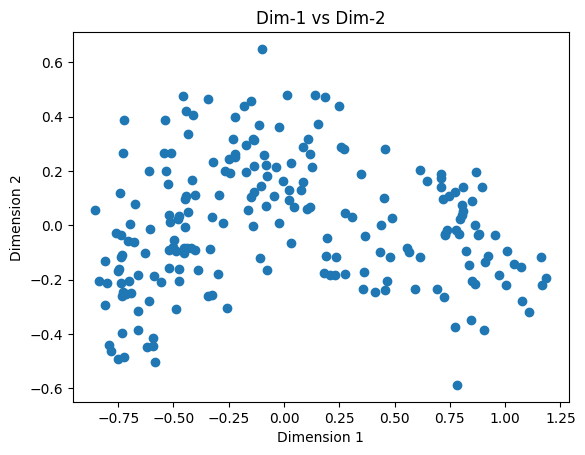

In [13]:
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Dim-1 vs Dim-2")
plt.show()

**Create Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

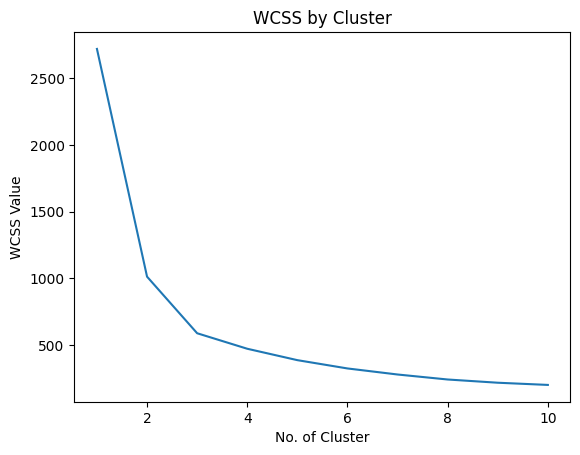

In [16]:
from sklearn.cluster import KMeans

#Create 10 model with 1 to 10 cluster
wcss = [] #WCSS- within cluster sum of square metric used to identify the closeness of the cluster, lower the value more tight cluster would be
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  #Fit the data points
  kmeans.fit(data.values)
  #Get the WCSS(inertia) value
  wcss.append(kmeans.inertia_)

#Plot the graph for WCSS value for number of cluster
plt.plot(range(1,11), wcss)
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS Value")
plt.title("WCSS by Cluster")
plt.show()

In [19]:
from sklearn.cluster import KMeans

#Create model with 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
#Fit the data and predict the cluster
km_cluster = model.fit_predict(data.values)
#View the Cluster
km_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

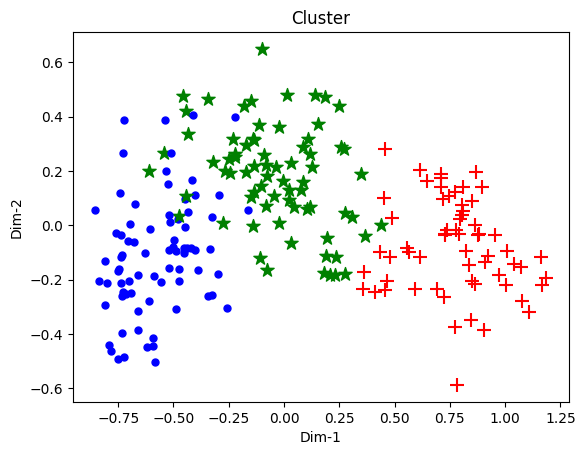

In [30]:
#View the Cluster in grpah

def plot_cluster(samples, clusters):
  col_dic = {0: 'blue', 1:'red', 2:'green'}
  mark_dic = {0: '.', 1:'+', 2:'*'}
  colors = [col_dic[x] for x in clusters]
  marker = [mark_dic[x] for x in clusters]
  for sample in range(len(clusters)):
    plt.scatter(samples[sample][0], samples[sample][1], color= colors[sample], marker=marker[sample], s=100)
  plt.xlabel("Dim-1")
  plt.ylabel("Dim-2")
  plt.title("Cluster")
  plt.show()

plot_cluster(features_2d, km_cluster)

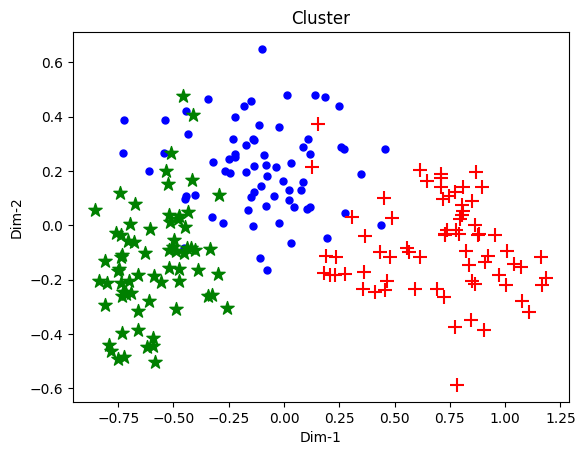

In [31]:
#Check the Cluster with Original values of dataset
seed_species = seed[seed.columns[-1]]
plot_cluster(features_2d, seed_species)

**Hierarchical Clustering**

*   Devisive
*   **Agglomerative**



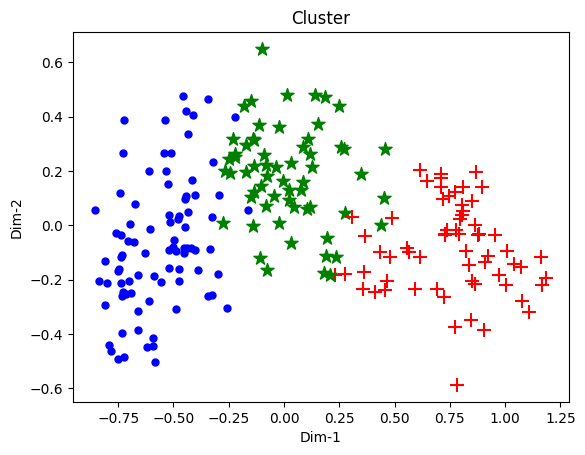

In [34]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

#View the Cluster in grpah

def plot_cluster(samples, clusters):
  col_dic = {0: 'blue', 1:'red', 2:'green'}
  mark_dic = {0: '.', 1:'+', 2:'*'}
  colors = [col_dic[x] for x in clusters]
  marker = [mark_dic[x] for x in clusters]
  for sample in range(len(clusters)):
    plt.scatter(samples[sample][0], samples[sample][1], color= colors[sample], marker=marker[sample], s=100)
  plt.xlabel("Dim-1")
  plt.ylabel("Dim-2")
  plt.title("Cluster")
  plt.show()

plot_cluster(features_2d, agg_clusters)